In [79]:
print('Pontificia Universidad Javeriana')
print()
print()
print('   Inteligencia Artificial')
print('       Proyecto Final')
print()
print()
print('   Santiago Figueroa Mora')
print()
print()
print('       Noviembre 2021')

Pontificia Universidad Javeriana


   Inteligencia Artificial
       Proyecto Final


   Santiago Figueroa Mora


       Noviembre 2021


In [80]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import model_selection
from sklearn import naive_bayes

In [64]:
#Vectores
tit_col = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
resu = ["No tiene diabetes","si tiene diabetes"]

#Importación base de datos
data = pd.read_csv('diabetes.csv')

#Separar base de datos en un determinado porcentaje para entrenar la maquina
train, test = train_test_split(data, test_size = 0.3, stratify = data['Outcome'], random_state = 42)

#matriz y vector para entrenar la maquina según porcentaje de separación de datos
X_train = train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y_train = train.Outcome

#matriz y vector para testear en la maquina según porcentaje de separación de datos restante
X_test = test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y_test = test.Outcome
#print(train)

#Árbol de decisión
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)

#Accuracy
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.727


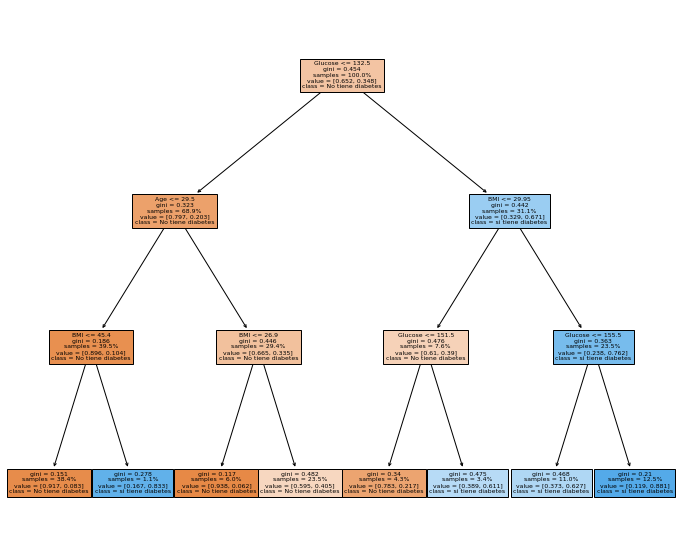

In [65]:
#Gráfica árbol de decisión
plt.figure(figsize = (12,10))
plot_tree(mod_dt, feature_names = tit_col, class_names = resu, filled = True, proportion = True);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


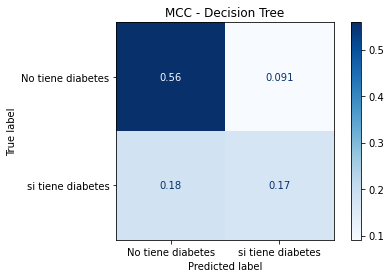

In [66]:
#MCC
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test, display_labels=resu, cmap=plt.cm.Blues, normalize='all')
disp.ax_.set_title('MCC - Decision Tree');

In [67]:
#F1
print('The F1 of the Decision Tree is = ',"{:.3f}".format(metrics.f1_score(prediction, y_test,average = 'macro')))

#Cross validation
print('The cross validation of the Decision Tree is = ',model_selection.cross_val_score(mod_dt, X_train, y_train, cv = 5))

#Coeficiente de silueta
print('The silhouette coeficient of the Decision Tree is = ',"{:.3f}".format(metrics.silhouette_score(X_test, y_test, metric='euclidean')))

The F1 of the Decision Tree is =  0.678
The cross validation of the Decision Tree is =  [0.7962963  0.74074074 0.69158879 0.74766355 0.71962617]
The silhouette coeficient of the Decision Tree is =  0.077


In [68]:
#Variables que almacenan el porcentaje de datos usados para entrenar la maquina y el número de capas usado en el "Decision Tree Classifier", para el mejor accuracy encontrado
máx_accuracy = 0
máx_size = 0
máx_depth = 0

#Iteración de datos para encontrar elmejor accuracy
#for de 0 a 50 para determinar distintos porcentajes de datos para entrenar la maquina
for n in range(51):
  train, test = train_test_split(data, test_size = (n+1)/52, stratify = data['Outcome'], random_state = 42)
  X_train = train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
  y_train = train.Outcome
  X_test = test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
  y_test = test.Outcome

#for de 0 a 50 que determina la cantidad de capas a utilizar por cada porcentaje diferente usado para entrenar la maquina
  for m in range(51):
    mod_dt = DecisionTreeClassifier(max_depth = m+1, random_state = 1)
    mod_dt.fit(X_train,y_train)
    prediction=mod_dt.predict(X_test)
    #print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)),'  ;  ','test_size = ',(n+1)/52,'  ;  ','max_depth = ',m+1)

#Condición que compara el mejor accuracy y almacena porcentaje de entranamiento y número de capas implementadas
    if metrics.accuracy_score(prediction,y_test) > máx_accuracy:
      máx_accuracy = metrics.accuracy_score(prediction,y_test)
      máx_size = (n+1)/52
      máx_depth = m+1

#Imprime los datos almacenados en las variables
print('máx_accuracy = ',máx_accuracy)
print('máx_size = ',máx_size)
print('máx_depth = ',máx_depth)

máx_accuracy =  0.8666666666666667
máx_size =  0.038461538461538464
máx_depth =  9


The accuracy of the Decision Tree is 0.867


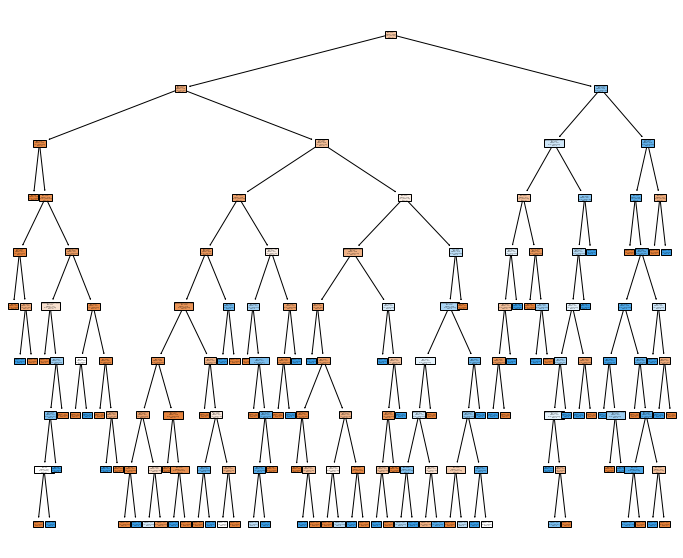

In [59]:
#Separar base de datos según máxmimo porcentaje para obtener el mayor accuracy
train, test = train_test_split(data, test_size = máx_size , stratify = data['Outcome'], random_state = 42)

#matriz y vector para entrenar la maquina según porcentaje de separación de datos
X_train = train[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y_train = train.Outcome

#matriz y vector para entrenar la maquina según porcentaje de separación de datos
X_test = test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y_test = test.Outcome
#print(train)

#Árbol de decisión
mod_dt = DecisionTreeClassifier(max_depth = máx_depth , random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)

#Máx Accuracy
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

#Gráfica árbol de decisión según valores máximos
plt.figure(figsize = (12,10))
plot_tree(mod_dt, feature_names = tit_col, class_names = resu, filled = True, proportion = True);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


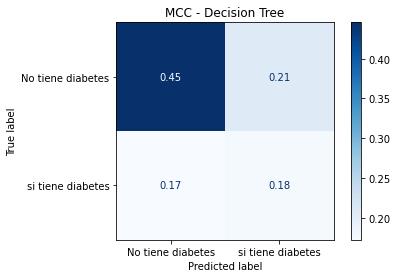

In [69]:
#MCC
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test, display_labels=resu, cmap=plt.cm.Blues, normalize='all')
disp.ax_.set_title('MCC - Decision Tree');

In [70]:
#F1
print('The F1 of the Decision Tree is = ',"{:.3f}".format(metrics.f1_score(prediction, y_test,average = 'macro')))

#Cross validation
print('The cross validation of the Decision Tree is = ',model_selection.cross_val_score(mod_dt, X_train, y_train, cv = 5))

#Coeficiente de silueta
print('The silhouette coeficient of the Decision Tree is = ',"{:.3f}".format(metrics.silhouette_score(X_test, y_test, metric='euclidean')))

The F1 of the Decision Tree is =  0.592
The cross validation of the Decision Tree is =  [0.66666667 0.66666667 0.66666667 0.66666667 0.5       ]
The silhouette coeficient of the Decision Tree is =  0.102
